## 0. Import required libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")



## 1. Load dataset



In [2]:
df = pd.read_csv('D:\Datasets\Online retail\Data.csv', encoding='ISO-8859-1')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


## 2.Clean and Pre-Process

In [5]:
# Convert invoice date to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']



0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [6]:
# Creating new year/month/date columns
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day


In [7]:
# Filtering by Date
df[df['InvoiceDate'] > '2011-01-01']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011,1,4
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011,1,4
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011,1,4
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011,1,4
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9


In [8]:
# missing customer id's sum and percentage
print(df['CustomerID'].isna().sum())

missing_percent = df['CustomerID'].isna().mean() * 100
print(missing_percent)

135080
24.926694334288598


In [9]:
# Drop rows without CustomerID 
df = df.dropna(subset=['CustomerID'])

In [10]:
# No. of returns/cancellations 
df[df['InvoiceNo'].astype(str).str.startswith('C')].shape[0]


8905

In [11]:
# Remove cancellations / returns: in this dataset, returns/invoices often have InvoiceNo starting with 'C'
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df['InvoiceNo'].shape[0]

397924

In [12]:
# Remove rows with non-positive quantity or price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.shape[0]



397884

In [13]:
# Create TotalPrice = quantity * price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['TotalPrice']



0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPrice, Length: 397884, dtype: float64

In [14]:
# Cast CustomerID (type float) to integer to str 
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)
df['CustomerID']
                                                      

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 397884, dtype: object

In [15]:
# df after cleaning and pre processing
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,2010,12,1,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,2010,12,1,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,2010,12,1,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,2010,12,1,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,2010,12,1,54.08


In [16]:
# Export for Power BI / Tableau
df.to_csv("ecommerce_cleaned.csv", index=False)
print("Exported successfully → ecommerce_cleaned.csv")

Exported successfully → ecommerce_cleaned.csv


In [17]:
# Monthly sales summary
monthly_sales = df.set_index('InvoiceDate').resample('ME')['TotalPrice'].sum().reset_index()
monthly_sales.to_csv("monthly_sales.csv", index=False)

# Product performance summary
product_sales = df.groupby('Description')['TotalPrice'].sum().reset_index()
product_sales.to_csv("product_sales.csv", index=False)


## 3. KPI computation & Exploratory Data Analysis (EDA)

In [18]:
#Assuming cost is 60% of selling price, that means profit margin on cost is 66.67%
total_revenue = df['TotalPrice'].sum()
total_orders = len(df['InvoiceNo'].unique())
unique_customers = len(df['CustomerID'].unique())

avg_order_value = df.groupby('InvoiceNo')['TotalPrice'].sum().mean()
avg_customer_value = df.groupby('CustomerID')['TotalPrice'].sum().mean()

print("Total Revenue:", total_revenue)
print("Total Orders:", total_orders)
print("Unique Customers:", unique_customers)
print("Average Order Value (AOV):", avg_order_value)
print("Average Customer Value :", avg_customer_value)

Total Revenue: 8911407.904
Total Orders: 18532
Unique Customers: 4338
Average Order Value (AOV): 480.86595639974104
Average Customer Value : 2054.2664601198708


### 3.1 monthly/ trend of revenue


In [19]:
monthly = df.set_index('InvoiceDate').resample('ME')['TotalPrice'].sum().reset_index()
monthly


,InvoiceDate,TotalPrice
0,2010-12-31,572713.890
1,2011-01-31,569445.040
2,2011-02-28,447137.350
3,2011-03-31,595500.760
4,2011-04-30,469200.361
5,2011-05-31,678594.560
6,2011-06-30,661213.690
7,2011-07-31,600091.011
8,2011-08-31,645343.900
9,2011-09-30,952838.382


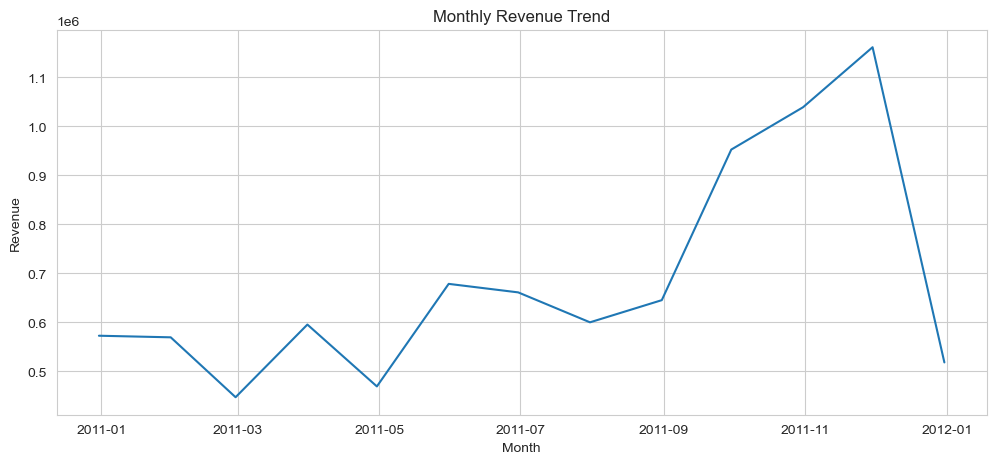

In [20]:
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly, x='InvoiceDate', y='TotalPrice')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


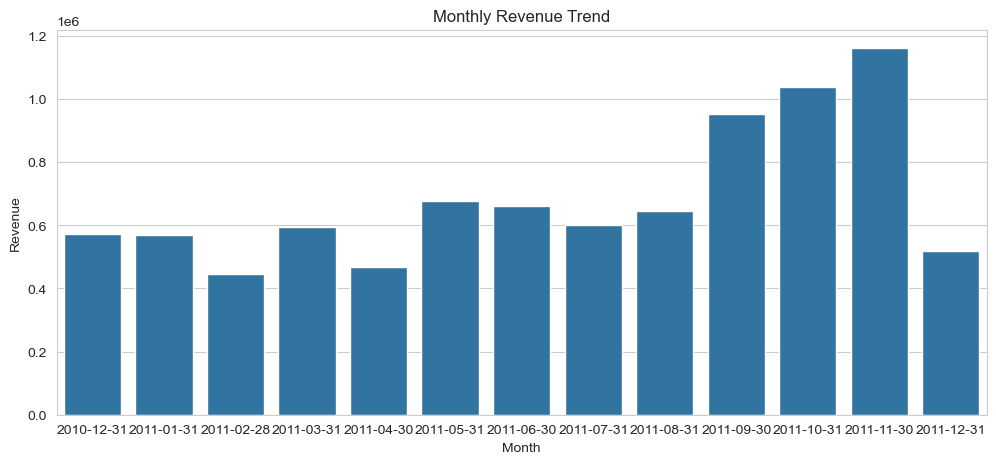

In [21]:
#barplot
plt.figure(figsize=(12,5))
sns.barplot(data=monthly, x='InvoiceDate', y='TotalPrice')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


### 3.2 weekly/ trend of revenue


In [22]:

weekly = df.set_index('InvoiceDate').resample('W')['TotalPrice'].sum().reset_index()
weekly['WeekNo'] = range(1, len(weekly) + 1)   
weekly = weekly.set_index('WeekNo')    
weekly.head()



,InvoiceDate,TotalPrice
WeekNo,,
1,2010-12-05,149386.33
2,2010-12-12,213447.72
3,2010-12-19,163770.73
4,2010-12-26,46109.11
5,2011-01-02,0.00


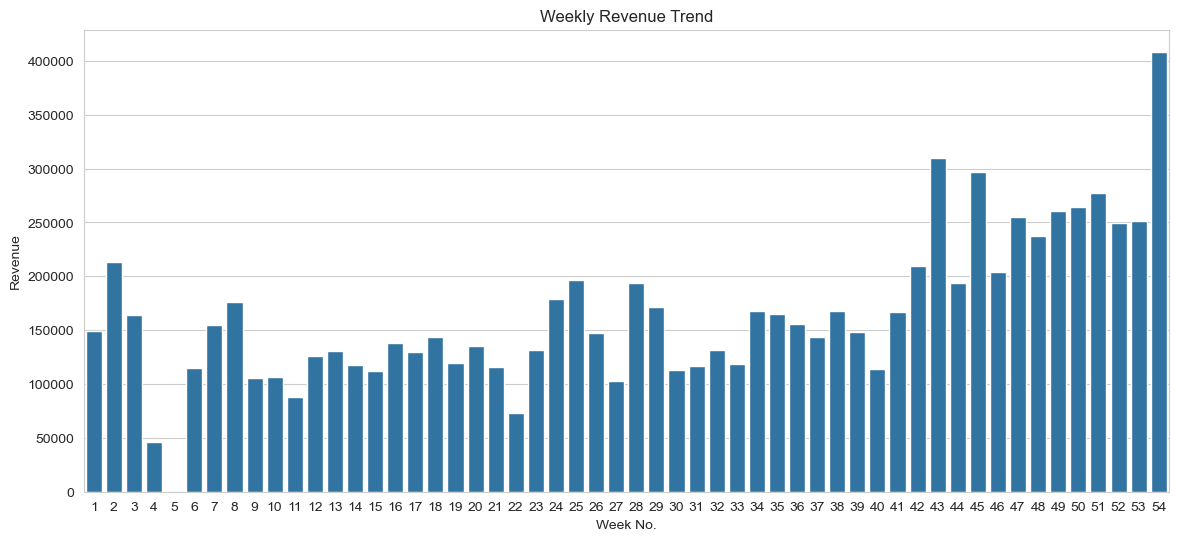

In [23]:
#barplot
plt.figure(figsize=(14,6))
sns.barplot(data=weekly, x='WeekNo', y='TotalPrice')
plt.title('Weekly Revenue Trend')
plt.xlabel('Week No.')
plt.ylabel('Revenue')
plt.show()

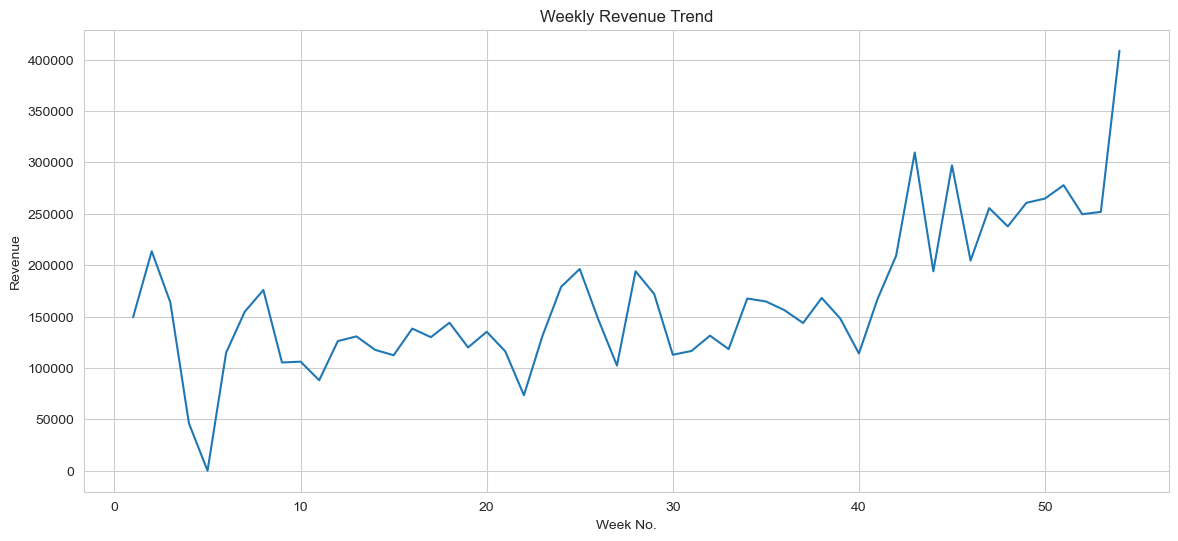

In [24]:
#lineplot
plt.figure(figsize=(14,6))
sns.lineplot(data=weekly, x='WeekNo', y='TotalPrice')
plt.title('Weekly Revenue Trend')
plt.xlabel('Week No.')
plt.ylabel('Revenue')
plt.show()

### 3.3 Top products BY REVENUE

In [25]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()
top_products

,Description,TotalPrice
0,"PAPER CRAFT , LITTLE BIRDIE",168469.60
1,REGENCY CAKESTAND 3 TIER,142592.95
2,WHITE HANGING HEART T-LIGHT HOLDER,100448.15
3,JUMBO BAG RED RETROSPOT,85220.78
4,MEDIUM CERAMIC TOP STORAGE JAR,81416.73
5,POSTAGE,77803.96
6,PARTY BUNTING,68844.33
7,ASSORTED COLOUR BIRD ORNAMENT,56580.34
8,Manual,53779.93
9,RABBIT NIGHT LIGHT,51346.20


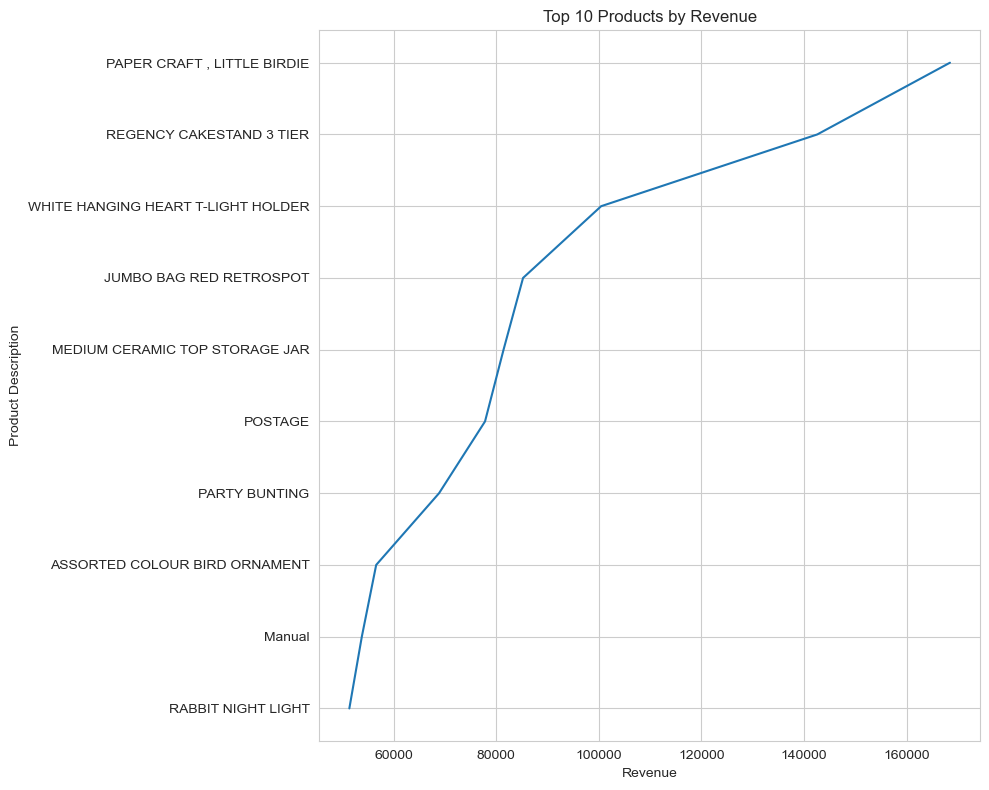

In [26]:
#lineplot

plt.figure(figsize=(10,8))
sns.lineplot(data=top_products, x='TotalPrice', y='Description')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

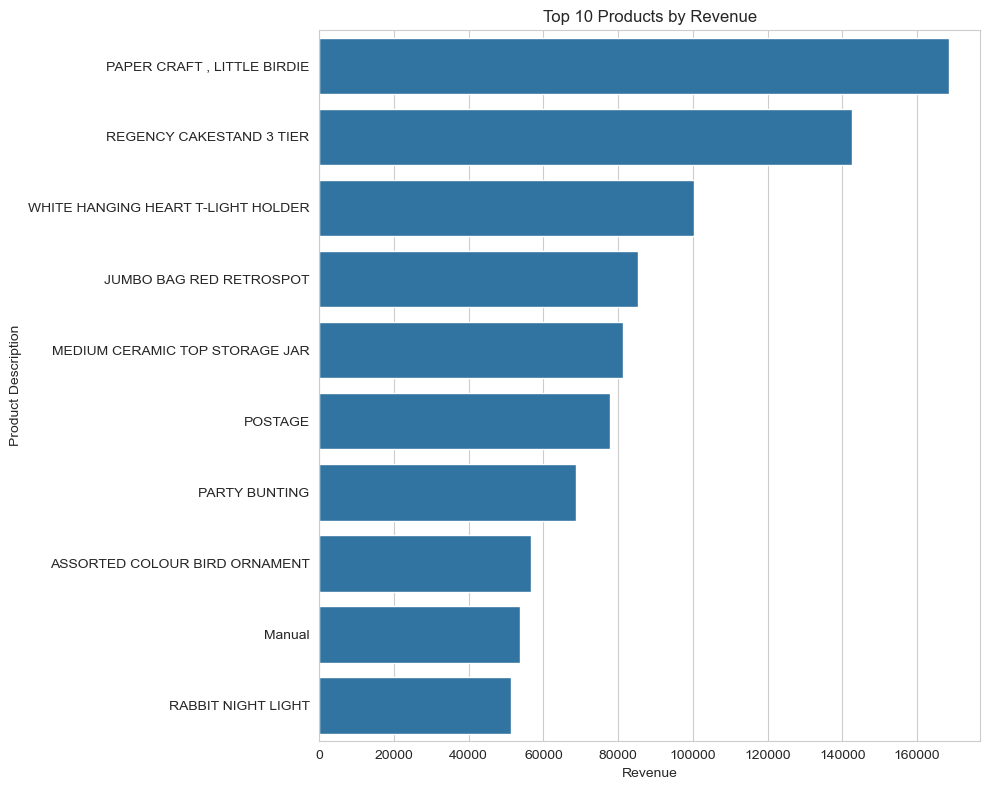

In [27]:
#barplot
plt.figure(figsize=(10,8))
sns.barplot(data=top_products, x='TotalPrice', y='Description', orient='h')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

### 3.4  Quantity distribution (to spot outliers / unusual orders)

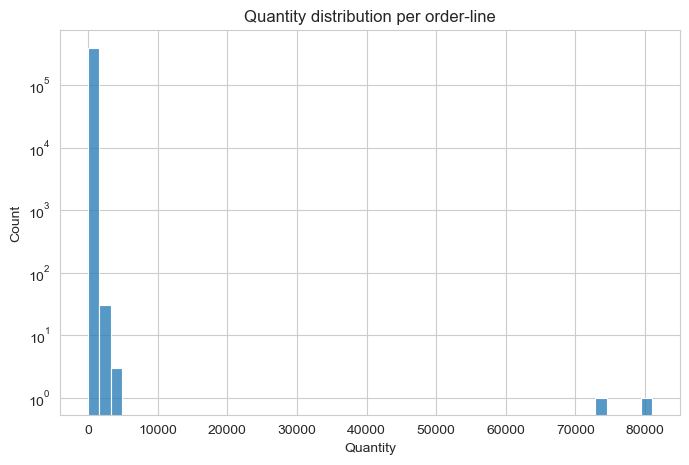

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=50)
plt.title('Quantity distribution per order-line')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.yscale('log')  # because distribution may be skewed
plt.show()


### 3.5 Sales by Country (region-wise insights)

In [29]:
#top 10 region-wise sales
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()
country_sales



,Country,TotalPrice
0,United Kingdom,7308391.554
1,Netherlands,285446.340
2,EIRE,265545.900
3,Germany,228867.140
4,France,209024.050
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38378.330


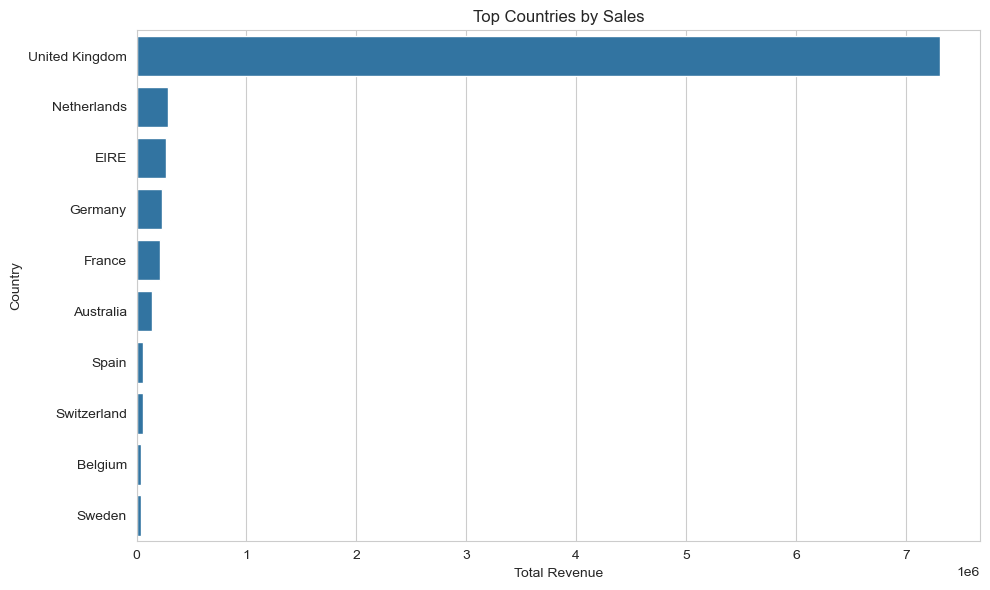

In [30]:
#barplot
plt.figure(figsize=(10,6))
sns.barplot(data=country_sales, x='TotalPrice', y='Country')
plt.title('Top Countries by Sales')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

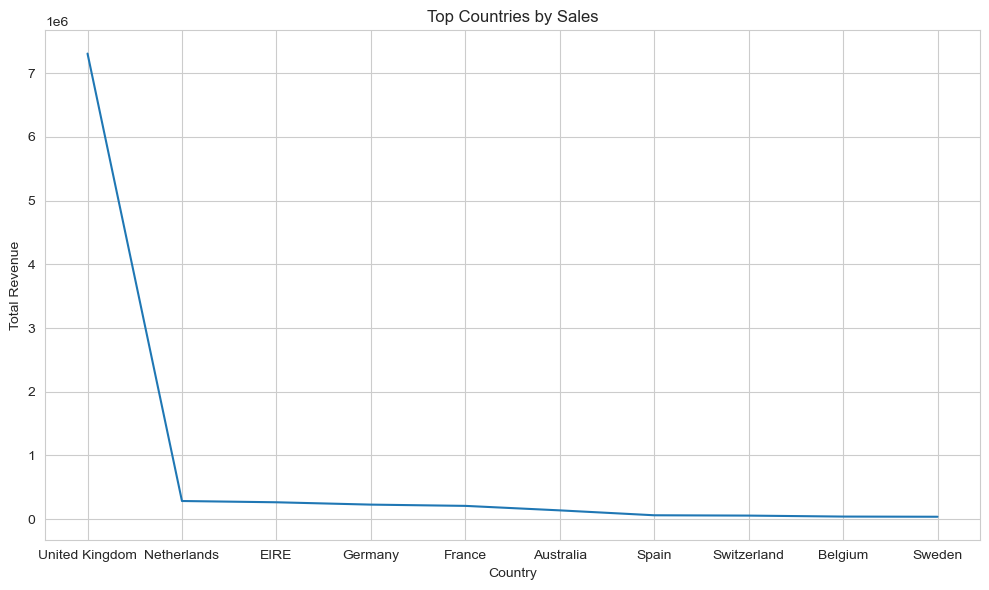

In [31]:
#lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=country_sales, x='Country', y='TotalPrice')
plt.title('Top Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

### 3.6 Correlation Heatmaps

In [32]:
corr = df[['Quantity', 'UnitPrice', 'TotalPrice']].corr()
corr



,Quantity,UnitPrice,TotalPrice
Quantity,1.000000,-0.004563,0.914387
UnitPrice,-0.004563,1.000000,0.081645
TotalPrice,0.914387,0.081645,1.000000


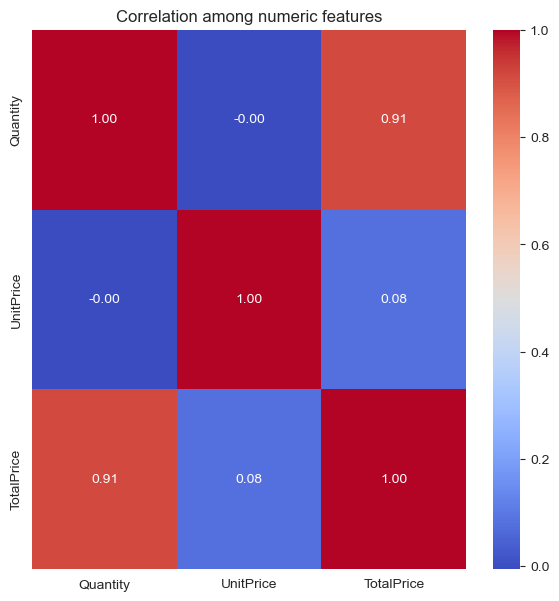

In [33]:
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation among numeric features')
plt.show()

## 4.Customer Behavior Analytics: Cohort (customer retention over time) 

In [34]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
first_purchase = df.groupby('CustomerID')['InvoiceDate'].min().dt.to_period('M').rename('CohortMonth')
first_purchase


CustomerID
12346    2011-01
12347    2010-12
12348    2010-12
12349    2011-11
12350    2011-02
          ...   
18280    2011-03
18281    2011-06
18282    2011-08
18283    2011-01
18287    2011-05
Name: CohortMonth, Length: 4338, dtype: period[M]

In [35]:
#returns a Dataframe
first_purchase_asdf = df.groupby('CustomerID')['InvoiceDate'] \
                   .min().dt.to_period('M') \
                   .reset_index(name='CohortMonth')
first_purchase_asdf

,CustomerID,CohortMonth
0,12346,2011-01
1,12347,2010-12
2,12348,2010-12
3,12349,2011-11
4,12350,2011-02
...,...,...
4333,18280,2011-03
4334,18281,2011-06
4335,18282,2011-08
4336,18283,2011-01


In [36]:
orders = df.groupby(['CustomerID', 'InvoiceMonth'])['InvoiceNo'].nunique().reset_index()
orders = orders.merge(first_purchase, on='CustomerID')
orders



,CustomerID,InvoiceMonth,InvoiceNo,CohortMonth
0,12346,2011-01,1,2011-01
1,12347,2010-12,1,2010-12
2,12347,2011-01,1,2010-12
3,12347,2011-04,1,2010-12
4,12347,2011-06,1,2010-12
...,...,...,...,...
13049,18283,2011-10,1,2011-01
13050,18283,2011-11,4,2011-01
13051,18283,2011-12,1,2011-01
13052,18287,2011-05,1,2011-05


In [37]:
#finding cohort index
orders['CohortIndex'] = (orders['InvoiceMonth'] - orders['CohortMonth']).apply(lambda x: x.n)
orders['CohortIndex']


0         0
1         0
2         1
3         4
4         6
         ..
13049     9
13050    10
13051    11
13052     0
13053     5
Name: CohortIndex, Length: 13054, dtype: int64

In [38]:
cohort_counts = orders.pivot_table(index='CohortMonth',
                                   columns='CohortIndex',
                                   values='InvoiceNo',
                                   aggfunc='nunique').fillna(0)
cohort_counts

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,13.0,9.0,8.0,12.0,8.0,13.0,11.0,12.0,9.0,14.0,12.0,15.0,7.0
2011-01,4.0,4.0,4.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,6.0,3.0,0.0
2011-02,4.0,4.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0,6.0,3.0,0.0,0.0
2011-03,4.0,3.0,4.0,5.0,3.0,4.0,4.0,4.0,4.0,3.0,0.0,0.0,0.0
2011-04,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0
2011-05,5.0,4.0,3.0,3.0,4.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0
2011-06,3.0,3.0,3.0,4.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-07,4.0,3.0,3.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-08,3.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes



CohortMonth
2010-12    13.0
2011-01     4.0
2011-02     4.0
2011-03     4.0
2011-04     4.0
2011-05     5.0
2011-06     3.0
2011-07     4.0
2011-08     3.0
2011-09     5.0
2011-10     6.0
2011-11     6.0
2011-12     2.0
Freq: M, Name: 0, dtype: float64

In [40]:
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.692308,0.615385,0.923077,0.615385,1.000000,0.846154,0.923077,0.692308,1.076923,0.923077,1.153846,0.538462
2011-01,1.0,1.000000,1.000000,1.250000,1.500000,1.250000,1.250000,1.250000,1.250000,1.250000,1.500000,0.750000,0.000000
2011-02,1.0,1.000000,1.250000,1.000000,0.750000,1.000000,0.750000,1.000000,1.000000,1.500000,0.750000,0.000000,0.000000
2011-03,1.0,0.750000,1.000000,1.250000,0.750000,1.000000,1.000000,1.000000,1.000000,0.750000,0.000000,0.000000,0.000000
2011-04,1.0,1.000000,0.750000,0.750000,1.000000,0.750000,0.750000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000
2011-05,1.0,0.800000,0.600000,0.600000,0.800000,0.600000,0.800000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-06,1.0,1.000000,1.000000,1.333333,1.333333,1.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-07,1.0,0.750000,0.750000,0.750000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08,1.0,1.000000,1.000000,1.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


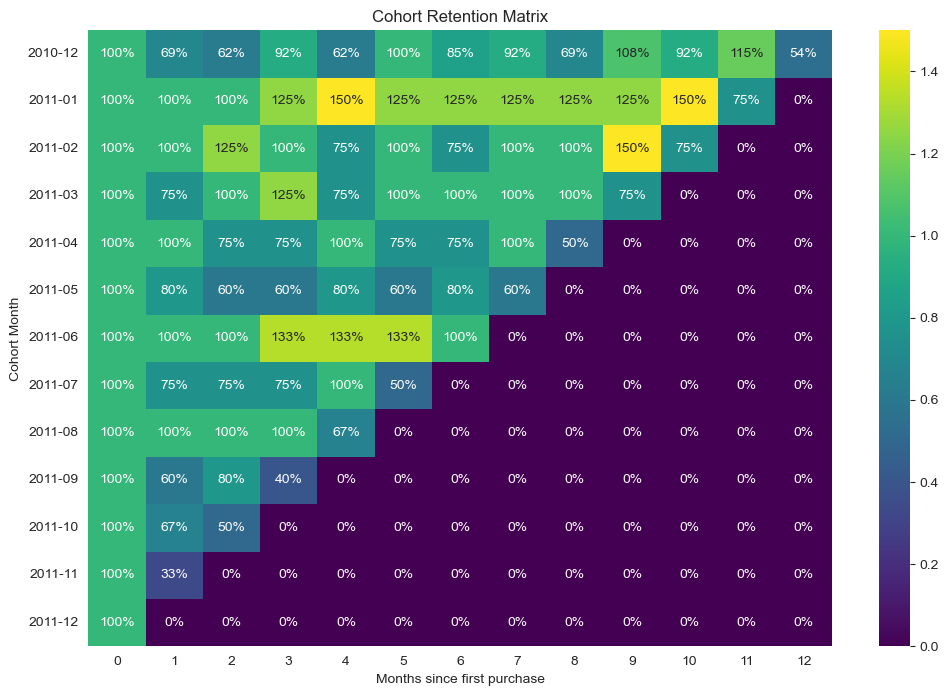

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='viridis')
plt.title('Cohort Retention Matrix')
plt.xlabel('Months since first purchase')
plt.ylabel('Cohort Month')
plt.show()

## 5. RFM (Recency, Frequency, Monetary) Segmentation

In [42]:
#creating rfm index table
import datetime as dt
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head(10)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40
5,12352,36,8,2506.04
6,12353,204,1,89.00
7,12354,232,1,1079.40
8,12355,214,1,459.40
9,12356,23,3,2811.43


In [43]:
#making rfm score columns
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

rfm.sort_values(by='RFM_Score', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
3937,17730,3,13,5298.48,5,5,5,555
934,13599,1,21,5153.67,5,5,5,555
1689,14646,2,73,280206.02,5,5,5,555
1876,14907,3,7,3501.10,5,5,5,555
1195,13969,7,18,9053.94,5,5,5,555
807,13426,1,10,3641.32,5,5,5,555
516,13021,4,9,2616.38,5,5,5,555
1,12347,2,7,4310.00,5,5,5,555
2632,15932,4,8,2495.87,5,5,5,555
1429,14291,2,11,3883.25,5,5,5,555


In [44]:
#creating a fucntion to seperate customers on the basis of therir rfm scores

def segment(rfm_score):
    r, f, m = map(int, list(rfm_score))
    if r>=4 and f>=4 and m>=4:
        return 'Champions'
    elif r>=3 and f>=3 and m>=3:
        return 'Loyal'
    elif r<=2 and f<=2 and m<=2:
        return 'At Risk'
    else:
        return 'Others'


rfm['Segment'] = rfm['RFM_Score'].apply(segment)
rfm.head(10)

        

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,12346,326,1,77183.60,1,1,5,115,Others
1,12347,2,7,4310.00,5,5,5,555,Champions
2,12348,75,4,1797.24,2,4,4,244,Others
3,12349,19,1,1757.55,4,1,4,414,Others
4,12350,310,1,334.40,1,1,2,112,At Risk
5,12352,36,8,2506.04,3,5,5,355,Loyal
6,12353,204,1,89.00,1,1,1,111,At Risk
7,12354,232,1,1079.40,1,1,4,114,Others
8,12355,214,1,459.40,1,1,2,112,At Risk
9,12356,23,3,2811.43,4,3,5,435,Loyal


In [45]:
# Segmenting no. of customers on the basis of rfm
rfm_no = rfm.groupby('Segment').agg({
    'CustomerID':'count',
    'Monetary':'mean',
    'Frequency':'mean',
    'Recency':'mean'
}).sort_values(by='Monetary', ascending=False)

rfm_no.rename(columns={'CustomerID':'NoOfCustomers'}, inplace=True)
total = rfm_no['NoOfCustomers'].sum()
rfm_no['Percentage%'] = ((rfm_no['NoOfCustomers'] / total) * 100).astype(int)

rfm_no

,NoOfCustomers,Monetary,Frequency,Recency,Percentage%
Segment,,,,,
Champions,962,6038.816081,11.080042,12.861746,22
Loyal,758,1842.600819,4.125330,35.688654,17
Others,1794,844.818585,2.166667,96.828874,41
At Risk,824,230.304455,1.042476,228.503641,18


In [62]:
# Customer RFM (Power BI/ Tableau)
rfm.to_csv("rfm_segments.csv", index=False) # run after RFM section